In [1]:
from tensorflow.keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [4]:
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print(decoded_review)
print(train_data[0])
print(train_labels[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [2]:
#multi-hot encoding

import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_train.shape

(25000, 10000)

In [7]:
import tensorflow as tf

def imdb_model(hidd_neu = 16, hidd_act='relu',do_freq=0.2):
  return tf.keras.Sequential(
    [
      tf.keras.layers.Input(shape=(10000,)),
      tf.keras.layers.Dense(hidd_neu,activation=hidd_act),
      tf.keras.layers.Dense(hidd_neu,activation=hidd_act),
      #tf.keras.layers.Dense(hidd_neu,activation=hidd_act),
      tf.keras.layers.Dropout(do_freq),
      tf.keras.layers.Dense(1, activation='sigmoid') 
    ]
  )

model = imdb_model(hidd_neu=64)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    #loss='mse',
    metrics=['accuracy'],
)

In [9]:
H = model.fit(x_train, y_train,batch_size=512,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
49/49 [==============================] - 4s 78ms/step - loss: 0.4286 - accuracy: 0.8076 - val_loss: 0.2954 - val_accuracy: 0.8868
Epoch 2/3
49/49 [==============================] - 3s 66ms/step - loss: 0.2448 - accuracy: 0.9064 - val_loss: 0.2865 - val_accuracy: 0.8848
Epoch 3/3
49/49 [==============================] - 3s 65ms/step - loss: 0.1879 - accuracy: 0.9302 - val_loss: 0.2925 - val_accuracy: 0.8851


In [10]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.2925 - accuracy: 0.8851


In [11]:
import matplotlib.pyplot as plt

def plot_history(H):
  plt.figure(figsize=(10, 10))
  plt.plot( H.history["loss"], label="train_loss")
  plt.plot( H.history["accuracy"], label="train_acc")
  plt.plot( H.history["val_loss"], label="validation_loss")
  plt.plot( H.history["val_accuracy"], label="validation_acc")

  plt.title("Loss / accuracy evolution")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss / Accuracy")
  plt.ylim([0, 1])  
  leg=plt.legend()

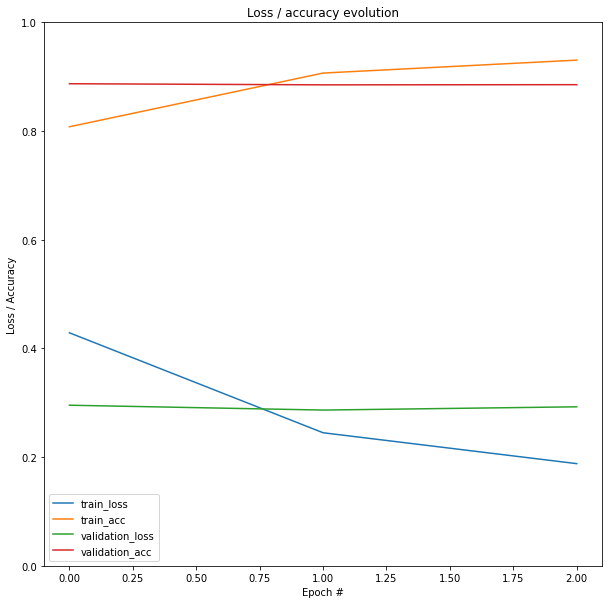

In [12]:
plot_history(H)

In [24]:
predictions = model.predict(x_test)

In [26]:
predictions.shape

(25000, 1)